Pour ce projet nous utiliserons le tutoriel sur le DFS de l'université de Lyon.  
http://math.univ-lyon1.fr/irem/Formation_ISN/formation_parcours_graphes/profondeur/3_python2.html

In [1]:
import random
import matplotlib.pyplot as plt

class Maillon:
    # permet de faire le lien entre une valeur et une valeur suivante
    def __init__(self,valeur,suivant=None):
        self.valeur = valeur
        self.suivant = suivant
        
class Pile:
    # permet de remplir ou de désemplir la pile
    def __init__(self):
        self.taille = 0
        self.sommet = None
        
    def empiler(self,valeur):
        self.sommet = Maillon(valeur, self.sommet)
        self.taille += 1
        
    def depiler(self):
        if self.taille > 0:
            valeur = self.sommet.valeur
            self.sommet=self.sommet.suivant
            self.taille-=1
            return valeur
        
    def estVide(self):
        return self.taille==0
        
    def lireSommet(self):  
        return self.sommet.valeur
    

In [2]:
# Dimensions de la grille:
LARGEUR = 10
HAUTEUR = 12

def voisinage(couple):
    """
    Renvoie la liste des cellules voisines
    de la cellule (ligne, colonne) = couple dans la grille
    """
    
    listeVoisins =[]
    i,j = couple[0], couple[1]
    for d in (-1,1):
        if -1 < i+d < HAUTEUR: listeVoisins.append((i+d,j))
        if -1 < j+d < LARGEUR: listeVoisins.append((i,j+d))
    return listeVoisins

# Effectue le parcours en profondeur
def dfs(s):
    P={s:None}
    Q=Pile()
    Q.empiler(s)
    while not(Q.estVide()):
        u = Q.lireSommet()
        R=[y for y in voisinage(u) if y not in P]
        if R :
            v = random.choice(R)
            P[v]=u
            Q.empiler(v)
        else:
            Q.depiler()
    return P
    

In [3]:
# Trouver un chemin dans le labyrinthe
def find_path(graph, start, end, path=[]): 
    path = path+[start] 
    if start == end: 
        return path 
    for node in graph[start]: 
        if node not in path: 
            newpath = find_path(graph, node, end, path) 
            if newpath: 
                return newpath

In [4]:
# Fonction qui convertit le parcours du labyrinthe en graphe (dictionnaire de dictionnaires)
def dic_dfs(dic):
    new_dic = {}
    for sommet in dic.keys():
        new_dic[sommet] = [dic[sommet]]
        if dic[sommet] in new_dic.keys():
            new_dic[dic.get(sommet)].append(sommet)
    for sommet in dic.keys():
        new_dic[sommet] = {node : 1 for node in new_dic[sommet] if node != None }
    return new_dic

In [5]:
labyrinthe = [[0 for j in range(2*LARGEUR+1)] for i in range(2*HAUTEUR+1)]
parcours = dfs((0,0))
graphe = dic_dfs(parcours)
chemin = find_path(graphe, (0,0), (HAUTEUR-1,LARGEUR-1))

def dedale_resolu(labyrinthe,parcours,chemin):
    """
    Fonction dessinant le résultat
    """
    
    for i,j in parcours:
        labyrinthe[2*i+1][2*j+1]=1
        if (i,j) != (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 1
            labyrinthe[i+k+1][j+l+1] = 1
    
    # coloriage du chemin pour trouver la sortie du labyrinthe
    for i,j in chemin:
        labyrinthe[2*i+1][2*j+1]=5
        if (i,j) != (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 5
            labyrinthe[i+k+1][j+l+1] = 5
            
    labyrinthe[1][0] = 1
    labyrinthe[2*HAUTEUR-1][2*LARGEUR] = 5
        
    plt.imshow(labyrinthe)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    print('Le plus court chemin est', chemin)

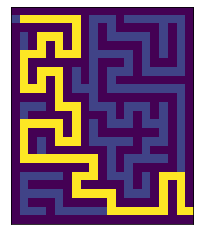

Le plus court chemin est [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 2), (1, 2), (1, 1), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3), (7, 3), (7, 2), (6, 2), (6, 1), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (9, 4), (9, 3), (10, 3), (10, 4), (10, 5), (11, 5), (11, 6), (11, 7), (11, 8), (10, 8), (9, 8), (9, 9), (10, 9), (11, 9)]


In [6]:
# afficher le labyrinthe et sa solution
dedale_resolu(labyrinthe,parcours,chemin)